In [1]:
import h5py
import numpy as np
import os
# import torch
# import pyvista

import matplotlib.pyplot as plt

In [2]:
file = os.path.join('..','data','pore-detection','pore_001.hdf5')

print(os.path.exists(file))
print(os.path.isfile(file))

True
True


In [3]:
f1 = h5py.File(file, 'r') 

In [4]:
for key in f1.keys():
    print('shape of %s' %key,f1[key].shape)
    print('dtype of %s' %key,f1[key].dtype)

shape of masks (1, 204, 778, 773)
dtype of masks bool
shape of raw (204, 778, 773)
dtype of raw float64


bool


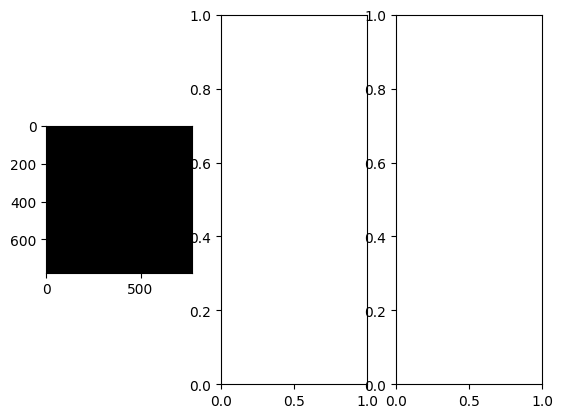

In [6]:
slice = 100
predictions = np.array(f1['masks'])

print(predictions.dtype)


fig, ax = plt.subplots(1,3)
ax[0].imshow(predictions[0,slice,:,:],cmap='gray')
# ax[1].imshow(predictions[1,slice,:,:],cmap='gray')
# ax[2].imshow(predictions[2,slice,:,:],cmap='gray')

In [8]:
vol  = f1['raw']
label =f1['label']


print(vol.shape)
print(label.shape)
print(type(label))
print(np.unique(label))
cls = np.unique(label)

(50, 1000, 1000)
(50, 1000, 1000)
<class 'h5py._hl.dataset.Dataset'>
[  0.     127.6375 135.8135 172.4492]


4
(4, 50, 1000, 1000) <class 'numpy.ndarray'>


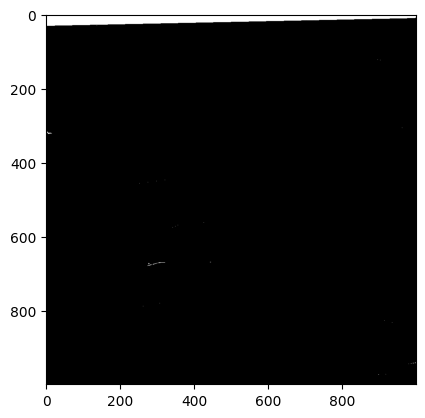

In [10]:
slice = 20
mask = np.array(label)
obj_ids = np.unique(mask)
obj_ids = obj_ids[:]
print(len(obj_ids))

masks = mask == obj_ids[:, None, None, None]
print(masks.shape,type(masks))



fig, ax = plt.subplots(1)
ax.imshow(masks[0,slice,:,:],cmap='gray')

In [31]:

print(masks[0,:,:,:].shape)
print(type(masks))
print(masks.dtype)
data = pyvista.wrap(masks[2,:,:,:].astype('uint8'))
# data.plot(volume=True)

points = np.random.random((10, 10,10))
print(points.shape)
print(type(points))
cloud = pyvista.wrap(points)

data.plot()

(50, 1000, 1000)
<class 'numpy.ndarray'>
bool
(10, 10, 10)
<class 'numpy.ndarray'>


Widget(value="<iframe src='http://localhost:55447/index.html?ui=P_0x1cec8e9c7f0_18&reconnect=auto' style='widt…

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

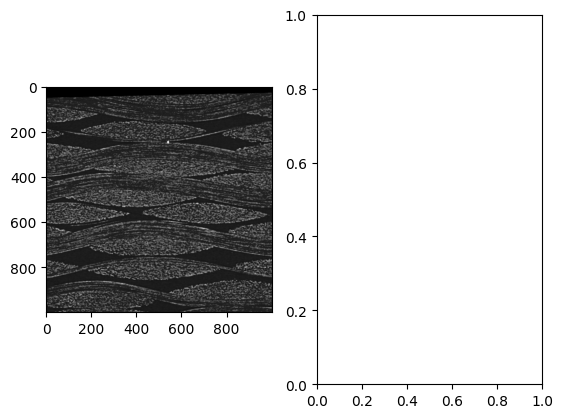

In [21]:
fig, ax = plt.subplots(1,2)
slice = 10
ax[0].imshow(vol[slice,:,:],cmap='gray')
ax[1].imshow(label2[slice,:,:])
# ax[2].imshow(pred[slice,:,:])

ax[0].title.set_text('CT-Data')
ax[1].title.set_text('GroundTruth')
# ax[2].title.set_text('Prediction')
ax[0].axis('off')
ax[1].axis('off')
# ax[2].axis('off')
# plot = ax[2].pcolor(pred[slice,:,:])
# fig.colorbar(plot)